## Multi-Class Classification on MNIST (Original Dataset)

### Import Required Libraries

In [1]:
import os
import io
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

### Loading MNIST (Original) Dataset

In [2]:
train_df = pd.read_csv('./Nepali Dataset/train_digits_data.csv')
test_df = pd.read_csv('./Nepali Dataset/test_digits_data.csv')

#### Train CSV - 17000 rows x 1025 columns (label + 32 x 32 pixels info)
#### Test CSV - 3000 rows x 1025 columns (label + 32 x 32 pixels info)

In [14]:
# Merging train and test MNIST CSV dataset
train_dataset = pd.concat([train_df, test_df], axis = 0, ignore_index = True)
train_dataset.tail(2)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [15]:
train_dataset['label'] = train_dataset['character'].str.replace('digit_', '').astype(int)
train_dataset = train_dataset.drop('character', axis = 1)

In [16]:
train_dataset.tail(2)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,label
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### Data Preprocessing

In [17]:
y = train_dataset['label']
X = train_dataset.drop('label', axis = 1)

### Dataset Visualization

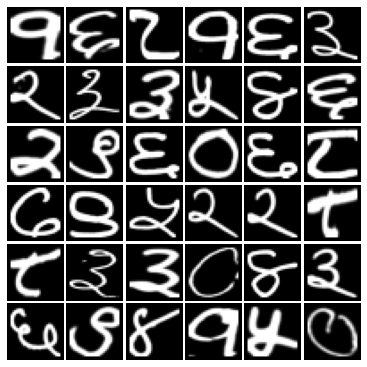

In [18]:
plt.figure(figsize = (5, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.05)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    rand_index = random.randint(0, len(X))
    rand_img = X.iloc[rand_index].to_numpy().reshape(32, 32)
    plt.imshow(rand_img, cmap = 'gray')
    plt.axis('off')
plt.show()    

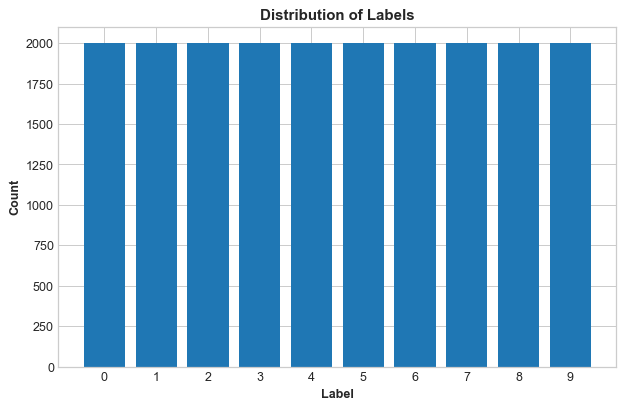

In [19]:
# Count the occurences of each category in the 'label' Column
label_counts = train_dataset['label'].value_counts()

# Get unique labels (class) and their count values
labels = label_counts.index
counts = label_counts.values

# Some Plotting Skills
plt.figure(figsize = (8, 5), dpi = 90)
plt.style.use('seaborn-whitegrid')
plt.bar(labels, counts)
plt.xticks(labels)
plt.xlabel('Label', fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('Count', fontdict = {'size':10, 'weight':'bold'})
plt.title('Distribution of Labels', fontdict = {'size':12, 'weight':'bold'})
plt.show()

### Split 'train_dataset' into 'train' and 'test' dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 69)

In [23]:
print("'X_train' Size(rows): ", len(X_train))
print("'y_train' Size(rows): ", len(y_train))
print("'X_test' Size(rows): ", len(X_test))
print("'y_test' Size(rows): ", len(y_test))

'X_train' Size(rows):  16000
'y_train' Size(rows):  16000
'X_test' Size(rows):  4000
'y_test' Size(rows):  4000


## Classification Models

### Logistic Regression

#### Feature Scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Training Logistic Regression

In [39]:
# setting a specific value for 'random_state' ensues that the logistic regression model's random initialization and shuffling of data points remains the same across different runs
# 'max_iter' determines the maximum number of iterations (epochs) that the model will perform to optimize the model's parameter
lr_classifier = LogisticRegression(random_state = 69, max_iter = 1500)
lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1500, random_state=69)

In [40]:
y_pred = lr_classifier.predict(X_test)

C:\Users\parzi\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [41]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8295


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57       394
           1       0.87      1.00      0.93       411
           2       0.90      0.70      0.79       404
           3       0.70      0.93      0.80       380
           4       0.97      0.91      0.94       400
           5       0.97      0.88      0.92       424
           6       1.00      0.58      0.73       419
           7       0.56      0.98      0.71       390
           8       0.97      0.95      0.96       390
           9       0.81      0.98      0.88       388

    accuracy                           0.83      4000
   macro avg       0.87      0.83      0.82      4000
weighted avg       0.88      0.83      0.82      4000



In [43]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,class,precision,recall,f1-score,support
0,0,1.000000,0.395939,0.567273,394
1,1,0.870488,0.997567,0.929705,411
2,2,0.898734,0.702970,0.788889,404
3,3,0.698225,0.931579,0.798196,380
4,4,0.965517,0.910000,0.936937,400
5,5,0.966495,0.884434,0.923645,424
6,6,0.995902,0.579952,0.733032,419
7,7,0.555072,0.982051,0.709259,390
8,8,0.971129,0.948718,0.959792,390
9,9,0.806383,0.976804,0.883450,388


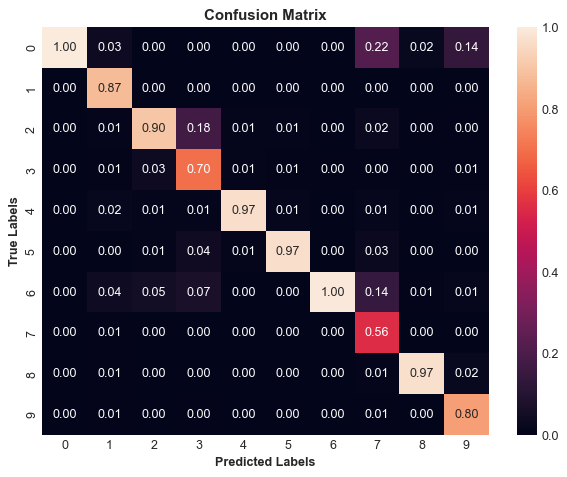

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]
plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('True Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.title('Confusion Matrix',  fontdict = {'size':12, 'weight':'bold'})
plt.show()

## Support Vector Machine (SVM) - Poly

In [31]:
svm_clf = svm.SVC(kernel = 'poly')
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [32]:
y_pred_svm = svm_clf.predict(X_test)

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.978


In [34]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       394
           1       0.99      0.99      0.99       411
           2       0.96      0.97      0.96       404
           3       0.97      0.96      0.97       380
           4       0.99      0.97      0.98       400
           5       0.99      0.98      0.99       424
           6       0.99      0.97      0.98       419
           7       0.98      0.96      0.97       390
           8       0.99      0.99      0.99       390
           9       0.98      0.99      0.99       388

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [37]:
classification_rep = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,class,precision,recall,f1-score,support
0,0,0.931116,0.994924,0.961963,394
1,1,0.985472,0.990268,0.987864,411
2,2,0.958333,0.967822,0.963054,404
3,3,0.970822,0.963158,0.966975,380
4,4,0.994872,0.970000,0.982278,400
5,5,0.992840,0.981132,0.986951,424
6,6,0.992665,0.968974,0.980676,419
7,7,0.979167,0.964103,0.971576,390
8,8,0.992288,0.989744,0.991014,390
9,9,0.984615,0.989691,0.987147,388


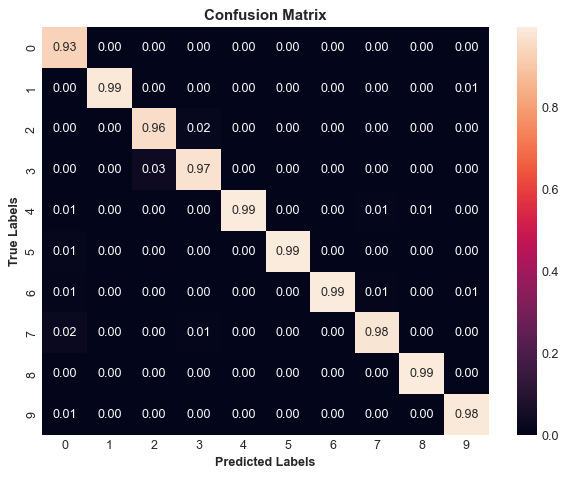

In [38]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]
plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('True Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.title('Confusion Matrix',  fontdict = {'size':12, 'weight':'bold'})
plt.show()